<a href="https://colab.research.google.com/github/Luqman9802/Lab04/blob/master/MY_PERSONAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q sentence-transformers faiss-cpu scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.4 MB/s eta 0:00:00


In [14]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import faiss
import numpy as np

# Load the pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')


In [15]:
texts = [
    "The sky is blue.",
    "The sun is bright today.",
    "It’s a good day for a walk.",
    "Dogs are great companions.",
    "I love programming in Python.",
    "Artificial intelligence is evolving rapidly.",
    "The ocean is calm and vast.",
    "Let’s go for a swim.",
    "Cats are independent pets.",
    "Tomorrow might rain."
]

# Generate embeddings for the sentences
embeddings = model.encode(texts)

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

similarity_matrix = cosine_similarity(embeddings)
similarity_df = pd.DataFrame(similarity_matrix, index=texts, columns=texts)
print(similarity_df.round(2))

                                              The sky is blue.  \
The sky is blue.                                          1.00   
The sun is bright today.                                  0.45   
It’s a good day for a walk.                               0.17   
Dogs are great companions.                                0.07   
I love programming in Python.                             0.04   
Artificial intelligence is evolving rapidly.              0.09   
The ocean is calm and vast.                               0.33   
Let’s go for a swim.                                      0.11   
Cats are independent pets.                               -0.00   
Tomorrow might rain.                                      0.29   

                                              The sun is bright today.  \
The sky is blue.                                                  0.45   
The sun is bright today.                                          1.00   
It’s a good day for a walk.                        

In [18]:
cos_sim = cosine_similarity(embeddings)
print("Cosine Similarity Matrix:")
print(np.round(cos_sim, 2))


Cosine Similarity Matrix:
[[ 1.    0.45  0.17  0.07  0.04  0.09  0.33  0.11 -0.    0.29]
 [ 0.45  1.    0.36  0.14  0.02  0.1   0.36  0.16  0.    0.33]
 [ 0.17  0.36  1.    0.32  0.11  0.05  0.15  0.29  0.07  0.39]
 [ 0.07  0.14  0.32  1.    0.2   0.14  0.14  0.08  0.4   0.08]
 [ 0.04  0.02  0.11  0.2   1.    0.28  0.1   0.17  0.15  0.06]
 [ 0.09  0.1   0.05  0.14  0.28  1.    0.15  0.14  0.03  0.12]
 [ 0.33  0.36  0.15  0.14  0.1   0.15  1.    0.32 -0.03  0.2 ]
 [ 0.11  0.16  0.29  0.08  0.17  0.14  0.32  1.    0.04  0.36]
 [-0.    0.    0.07  0.4   0.15  0.03 -0.03  0.04  1.    0.01]
 [ 0.29  0.33  0.39  0.08  0.06  0.12  0.2   0.36  0.01  1.  ]]


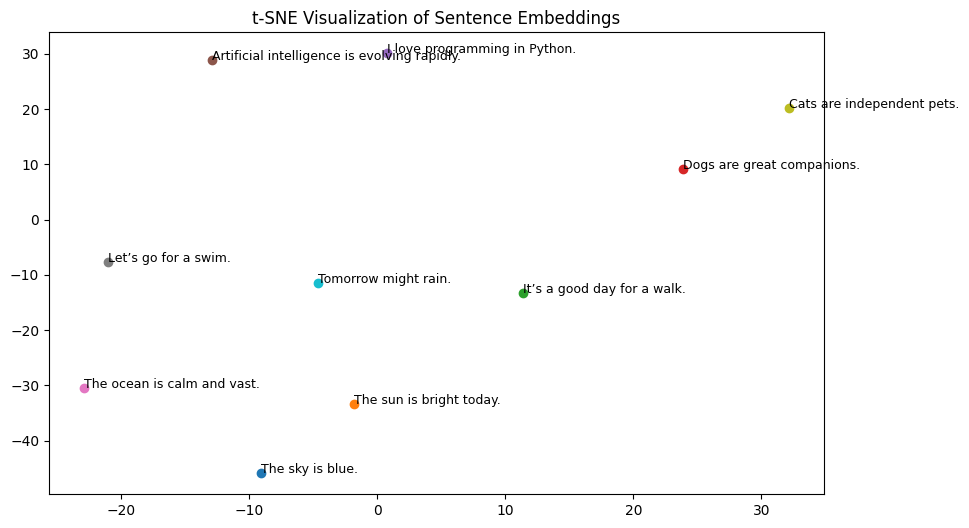

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=5, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 6))
for i, label in enumerate(texts):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, label, fontsize=9)
plt.title('t-SNE Visualization of Sentence Embeddings')
plt.show()

In [21]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=3, random_state=42)
reduced = tsne.fit_transform(embeddings)

In [23]:
# Create FAISS index
dimension = embeddings[0].shape[0]
index = faiss.IndexFlatL2(dimension)
index.add(np.array(embeddings))

# Define query sentences
queries = [
    "What's the weather like today?",
    "Should I carry an umbrella tomorrow?",
    "Is it a good day for walking outside?",
]

# Generate embeddings for the queries
query_embeddings = model.encode(queries)

# Perform similarity search
k = 3  # top-3 results
for i, q in enumerate(queries):
    D, I = index.search(np.array([query_embeddings[i]]), k)
    print(f"\nQuery: {q}")
    for j in range(k):
        print(f"  Match: {texts[I[0][j]]} (Distance: {D[0][j]:.4f})")


Query: What's the weather like today?
  Match: Tomorrow might rain. (Distance: 1.0086)
  Match: The sun is bright today. (Distance: 1.0667)
  Match: It’s a good day for a walk. (Distance: 1.2273)

Query: Should I carry an umbrella tomorrow?
  Match: Tomorrow might rain. (Distance: 0.9314)
  Match: It’s a good day for a walk. (Distance: 1.1761)
  Match: The sun is bright today. (Distance: 1.3110)

Query: Is it a good day for walking outside?
  Match: It’s a good day for a walk. (Distance: 0.4487)
  Match: The sun is bright today. (Distance: 1.2643)
  Match: Tomorrow might rain. (Distance: 1.2851)
